In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LI=load_iris()
df_iris=pd.DataFrame(data=LI.data,columns=LI.feature_names)
df_iris.head(2)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2

<Axes: >

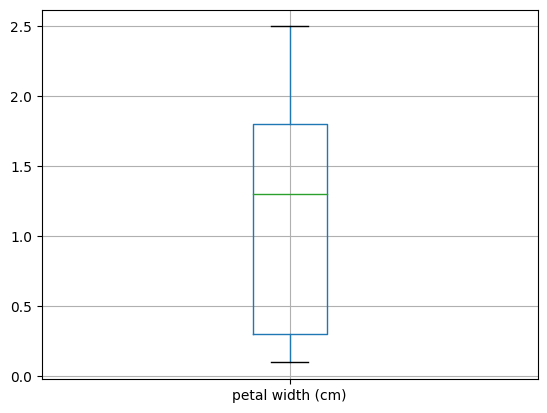

In [2]:
df_iris[['petal width (cm)']].boxplot()

<Axes: >

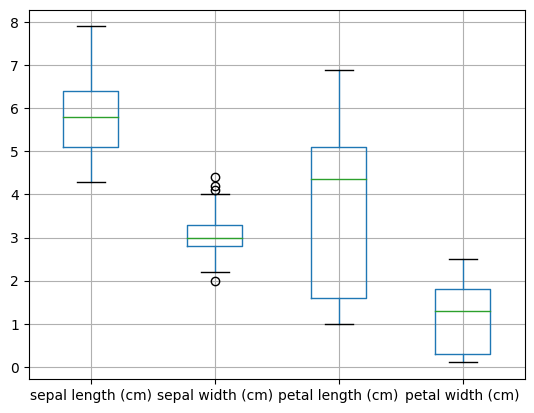

In [3]:
df_iris.boxplot()

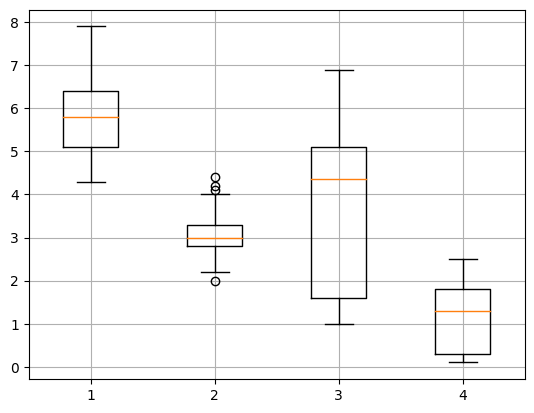

In [4]:
BP=plt.boxplot(df_iris)
plt.grid()

In [5]:
df_iris.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

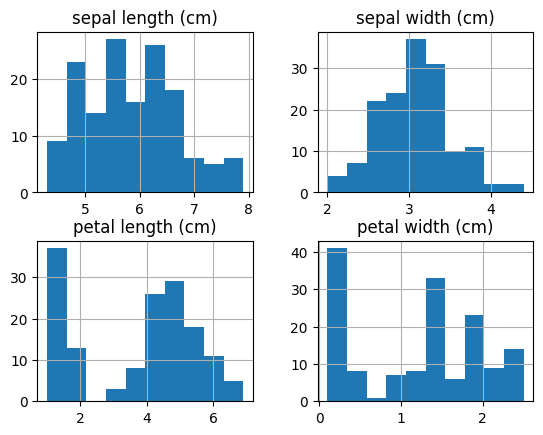

In [6]:
H=df_iris.hist()

In [7]:
#@title Cuántos datos atípicos tenemos
#
# Calculamos los cuartiles
Q=df_iris.quantile([0.25,0.75])
# Calculamos el rango intercuartílico
iqr=Q.loc[0.75]-Q.loc[0.25]
# Q.iloc[1]-Q.iloc[0]
iqr

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
dtype: float64

In [8]:
# Límites para datos atípicos
Li=Q.loc[0.25]-1.5*iqr # Límite inferior
Li

sepal length (cm)    3.15
sepal width (cm)     2.05
petal length (cm)   -3.65
petal width (cm)    -1.95
dtype: float64

In [9]:
Ls=Q.iloc[1]+1.5*iqr # Límite superior
Ls

sepal length (cm)     8.35
sepal width (cm)      4.05
petal length (cm)    10.35
petal width (cm)      4.05
dtype: float64

In [10]:
VF=(Li>df_iris)|(Ls<df_iris)
df_iris.shape,VF.shape

((150, 4), (150, 4))

In [12]:
VF.sum()

sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [17]:
#@title Cuáles son los valores atípicos
df_iris[VF.values]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
60                5.0               2.0                3.5               1.0

In [19]:
df_iris[VF.values]['sepal width (cm)']

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64